In [1]:
###Drug Classification Using Random Forest and AdaBoost Algorithm

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [3]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
#Exploratory Data Analysis

<AxesSubplot:xlabel='Cholesterol', ylabel='Na_to_K'>

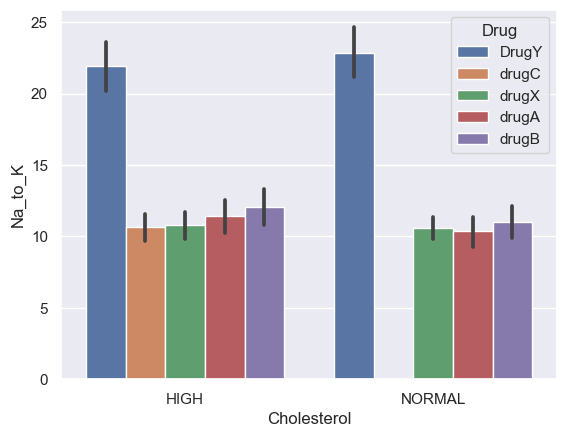

In [5]:
sns.barplot(data=df, x="Cholesterol",y="Na_to_K", hue="Drug")

<AxesSubplot:xlabel='Drug', ylabel='count'>

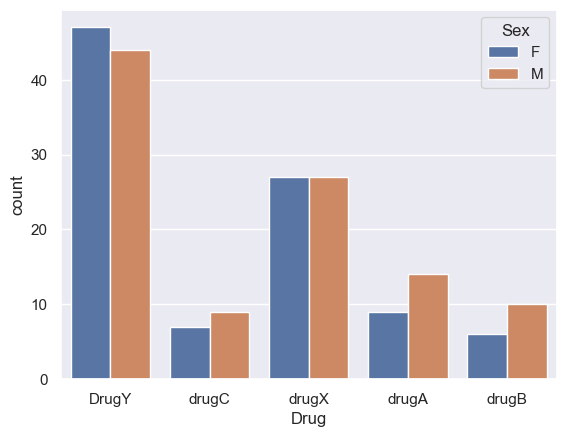

In [6]:
sns.countplot(data=df, x="Drug", hue="Sex")

<AxesSubplot:xlabel='BP', ylabel='count'>

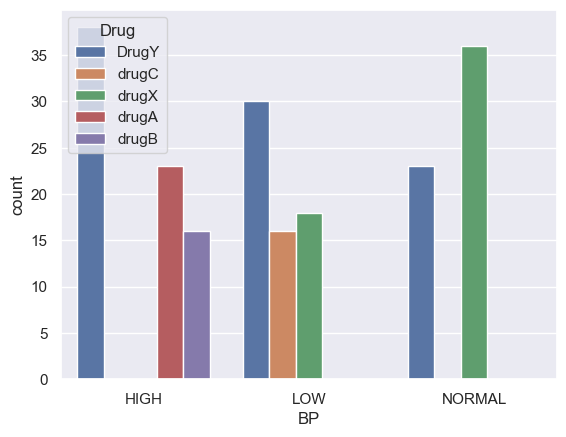

In [7]:
sns.countplot(data=df, x="BP", hue="Drug")

<AxesSubplot:xlabel='Age', ylabel='count'>

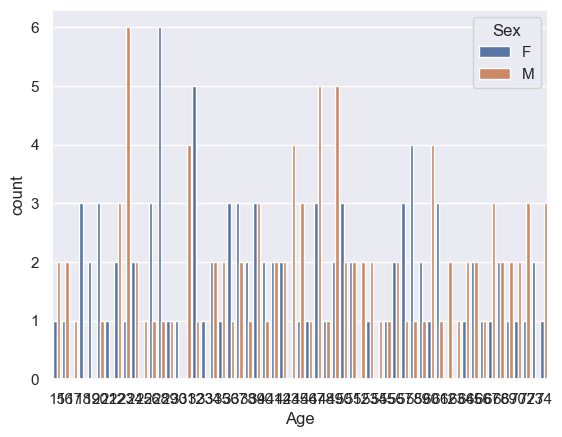

In [10]:
sns.countplot(data=df, x="Age", hue="Sex")

In [11]:
#Feature Engineering

In [12]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [13]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [14]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [15]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [16]:
#Change value in Sex column
df['Sex'] = df['Sex'].replace(['F'],'0')
df['Sex'] = df['Sex'].replace(['M'],'1')
#Change value in BP column
df['BP'] = df['BP'].replace(['LOW'],'0')
df['BP'] = df['BP'].replace(['NORMAL'],'1')
df['BP'] = df['BP'].replace(['HIGH'],'2')
#Change value in Cholesterol column
df['Cholesterol'] = df['Cholesterol'].replace(['NORMAL'],'0')
df['Cholesterol'] = df['Cholesterol'].replace(['HIGH'],'1')
#Change value in Drug column
df['Drug'] = df['Drug'].replace(['DrugY'],'0')
df['Drug'] = df['Drug'].replace(['drugC'],'1')
df['Drug'] = df['Drug'].replace(['drugX'],'2')
df['Drug'] = df['Drug'].replace(['drugA'],'3')
df['Drug'] = df['Drug'].replace(['drugB'],'4')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,0
1,47,1,0,1,13.093,1
2,47,1,0,1,10.114,1
3,28,0,1,1,7.798,2
4,61,0,0,1,18.043,0


In [17]:
#Change the Datatype

In [18]:
#convert object data types column to integer
df['Sex'] = pd.to_numeric(df['Sex'])
df['BP'] = pd.to_numeric(df['BP'])
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'])
df['Drug'] = pd.to_numeric(df['Drug'])
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

<AxesSubplot:xlabel='Age'>

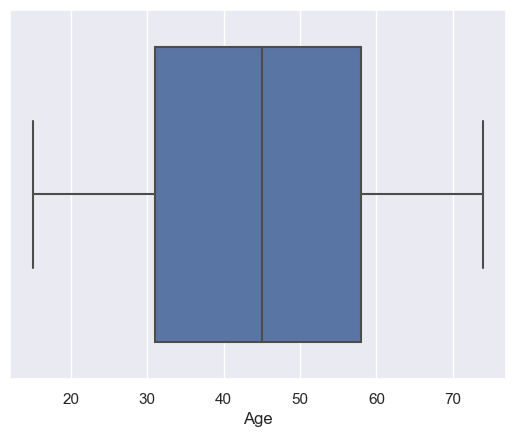

In [19]:
sns.boxplot(x=df["Age"])

<AxesSubplot:xlabel='Na_to_K'>

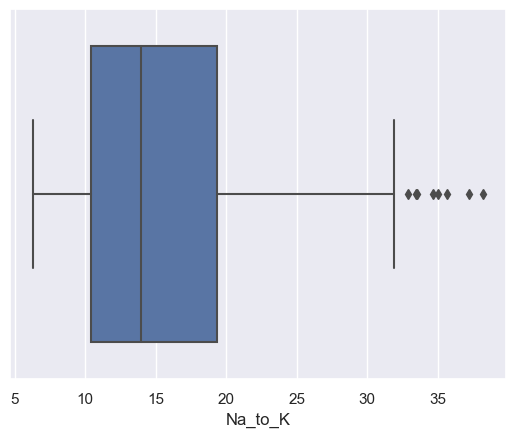

In [20]:
sns.boxplot(x=df["Na_to_K"])

In [21]:
#Remove the Outlier

In [22]:
import scipy.stats as stats
import numpy as np
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis = 1)] 
data_clean.shape

(199, 6)

In [23]:
#Print the Outlier

In [24]:
df[~df.index.isin(data_clean.index)]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
96,58,0,0,1,38.247,0


In [25]:
#Data Correlation

<AxesSubplot:>

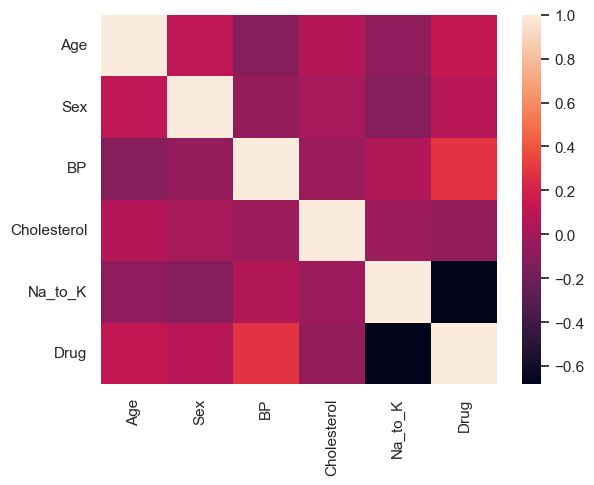

In [26]:
sns.heatmap(data_clean.corr(), fmt='.2g')

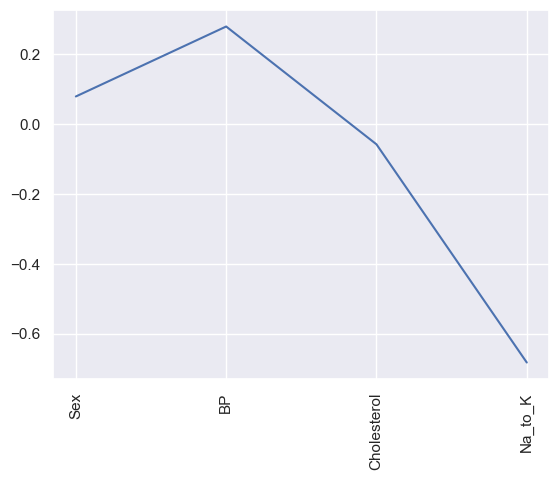

In [27]:
corr = data_clean[data_clean.columns[1:]].corr()['Drug'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

In [28]:
#Machine Learning Model Building


In [29]:
X = data_clean.drop('Drug', axis=1)
y = data_clean['Drug']

In [30]:
#test size 30% and train size 70%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [31]:
#Random Forest


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 98.33 %


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='weighted')))

F-1 Score :  0.983048433048433
Precision Score :  0.9857142857142857
Recall Score :  0.9833333333333333


Text(0.5, 1.0, 'Accuracy Score: 98.33333333333333')

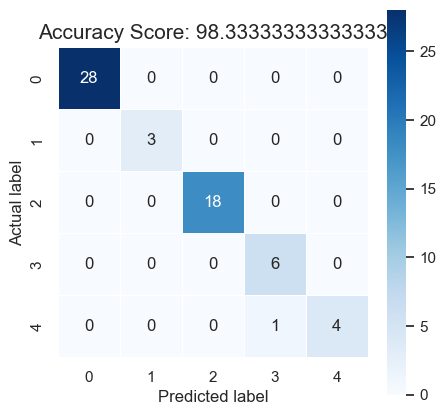

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

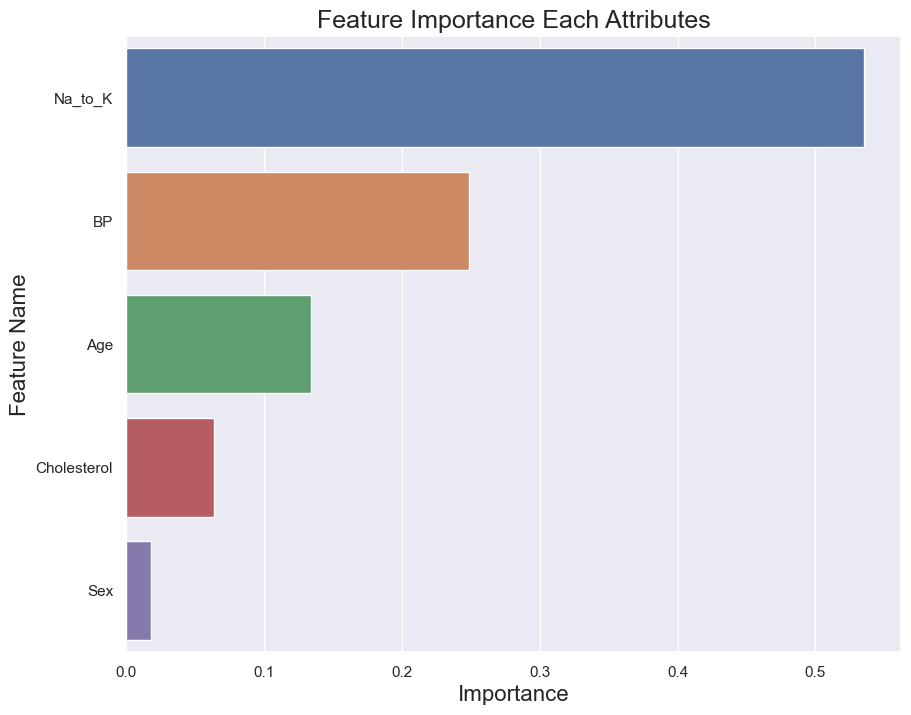

In [36]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [37]:
#AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [39]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 86.67 %


In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='weighted')))

F-1 Score :  0.8141779788838612
Precision Score :  0.7783549783549784
Recall Score :  0.8666666666666667


C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Score: 86.66666666666667')

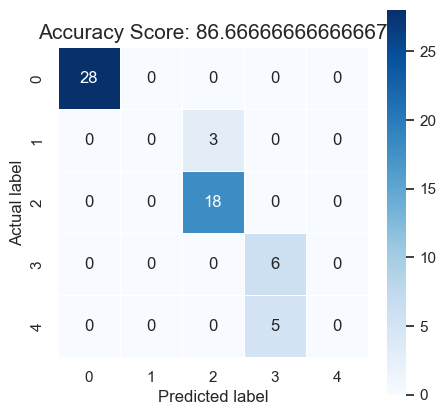

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(ada.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

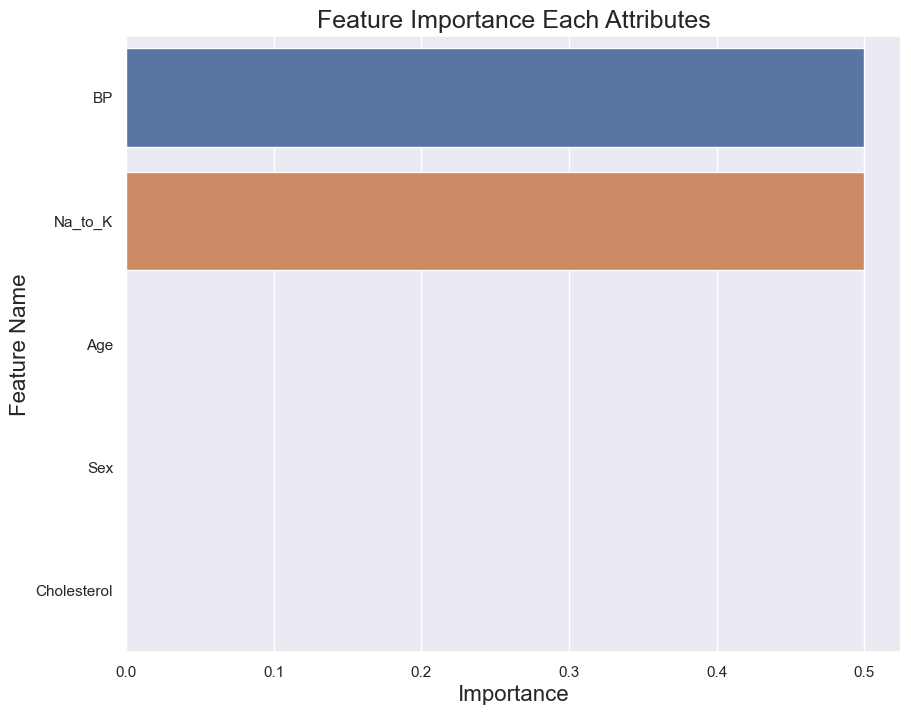

In [42]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()